#### <i>Task Performed By Tiruvail Varun</i>

# First let us begin by importing the required libraries that are necessary to perform the assigned task of data analysis

### Importing modules to gather data frames and to perform various operations and to visualize the corelation between them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Importing various data preprocessing libraries

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

### Importing modules to split data frames into test and train and fit them in the model

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score

### Importing modules to evaluate the test data vs predicted data

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

### Importing libraries that are required to predict the data

In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
import warnings
warnings.filterwarnings("ignore")

#### Importing the data from csv file to data frame

In [6]:
df=pd.read_csv('final_data_frame.csv')
df.head()

DATE  HNFSEPUSSA  HOUST1F  HSN1F  INTDSRUSM193N  LFACTTTTUSM657S  \
0  2000-01-01       311.0   1268.0  873.0           5.00         1.490972   
1  2000-02-01       299.0   1255.0  856.0           5.24         0.132849   
2  2000-03-01       313.0   1313.0  900.0           5.34        -0.015443   
3  2000-04-01       305.0   1275.0  841.0           5.50         0.222559   
4  2000-05-01       305.0   1230.0  857.0           5.71        -0.254289   

   MSACSR  NA000334Q NASDAQCOM  PERMIT  PERMIT1  QUSR628BIS  RSAHORUSQ156S  \
0     4.3  2448892.0       NaN  1727.0   1277.0     95.2517           67.1   
1     4.3  2448892.0       NaN  1692.0   1241.0     95.2517           67.1   
2     4.3  2448892.0       NaN  1651.0   1253.0     95.2517           67.1   
3     4.4  2569266.0       NaN  1597.0   1192.0     96.6747           67.3   
4     4.4  2569266.0       NaN  1543.0   1182.0     96.6747           67.3   

    TTLCONS  UNRATE  Median Home Price (NSA)  CPI-Adjusted Price  CSUSHPISA  
0  784940.0     4.0                131559.13           239289.53    100.552  
1  793737.0     4.1                131318.85           237445.83    101.339  
2  809459.0     4.0                132827.82           238210.25    102.126  
3  804766.0     3.8                134096.51           240345.10    102.922  
4  805005.0     4.0                135144.14           241940.32    103.678

### I have gathered the data from the following links and generated this data science model the data was integrated another file in the same folder named Dataset generation.

CSUSHPISA: S&P/Case-Shiller U.S. National Home Price Index Units: Index Jan 2000=100,Seasonally Adjusted
Frequency: Monthly Source: https://fred.stlouisfed.org/series/CSUSHPISA

HNFSEPUSSA: New One Family Homes for Sale in the United States Units: Thousands of Units,Seasonally Adjusted
Frequency: Monthly, End of Month Source: https://fred.stlouisfed.org/series/HNFSEPUSSA

HOUST1F: New Privately-Owned Housing Units Started: Single-Family Units Units: Thousands of Units,Seasonally Adjusted Annual Rate
Frequency: Monthly Source: https://fred.stlouisfed.org/series/HOUST1F

HSN1F: New One Family Houses Sold: United States Units: Thousands,Seasonally Adjusted Annual Rate
Frequency: Monthly Source: https://fred.stlouisfed.org/series/HSN1F

INTDSRUSM193N: Interest Rates, Discount Rate for United States Units: Percent per Annum,Not Seasonally Adjusted
Frequency: Monthly Source: https://fred.stlouisfed.org/series/INTDSRUSM193N

LFACTTTTUSM657S: Active Population: Aged 15 and over: All Persons for United States Units: Growth rate previous period,Seasonally Adjusted
Frequency: Monthly Source: https://fred.stlouisfed.org/series/LFACTTTTUSM657S

MSACSR: Monthly Supply of New Houses in the United States Units: Months' Supply,Seasonally Adjusted
Frequency: Monthly Source: https://fred.stlouisfed.org/series/MSACSR

NA000334Q: Gross Domestic Product Units: Millions of Dollars,Not Seasonally Adjusted
Frequency: Quarterly Source: https://fred.stlouisfed.org/series/NA000334Q

NASDAQCOM: NASDAQ Composite Index Units: Index Feb 5, 1971=100,Not Seasonally Adjusted
Frequency: Daily, Close Source: https://fred.stlouisfed.org/series/NASDAQCOM

PERMIT: New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units Units: Thousands of Units,Seasonally Adjusted Annual Rate
Frequency: Monthly Source: https://fred.stlouisfed.org/series/PERMIT

PERMIT1: New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Single-Family Units Units: Thousands of Units,Seasonally Adjusted Annual Rate
Frequency: Monthly Source: https://fred.stlouisfed.org/series/PERMIT1

QUSR628BIS: Real Residential Property Prices for United States Units: Index 2010=100,Not Seasonally Adjusted
Frequency: Quarterly Source: https://fred.stlouisfed.org/series/QUSR628BIS

RSAHORUSQ156S: Homeownership Rate in the United States Units: Percent,Seasonally Adjusted
Frequency: Quarterly Source: https://fred.stlouisfed.org/series/RSAHORUSQ156S

TTLCONS: Total Construction Spending: Total Construction in the United States Units: Millions of Dollars,Seasonally Adjusted Annual Rate
Frequency: Monthly Source: https://fred.stlouisfed.org/series/TTLCONS

UNRATE: Unemployment Rate Units: Percent,Seasonally Adjusted
Frequency: Monthly Source: https://fred.stlouisfed.org/series/UNRATE

CPI (Adjusted Price): Source: https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index.aspx

Median Home Prices (NSA): Units: Dollars Source: https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index.aspx

#### Getting the summary of the data frame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATE                     252 non-null    object 
 1   HNFSEPUSSA               252 non-null    float64
 2   HOUST1F                  252 non-null    float64
 3   HSN1F                    252 non-null    float64
 4   INTDSRUSM193N            252 non-null    float64
 5   LFACTTTTUSM657S          252 non-null    float64
 6   MSACSR                   252 non-null    float64
 7   NA000334Q                252 non-null    float64
 8   NASDAQCOM                12 non-null     object 
 9   PERMIT                   252 non-null    float64
 10  PERMIT1                  252 non-null    float64
 11  QUSR628BIS               252 non-null    float64
 12  RSAHORUSQ156S            252 non-null    float64
 13  TTLCONS                  252 non-null    float64
 14  UNRATE                   2

#### Visualizing if thaere are any null values in the dataframe that can cause trouble in thefuture

<Axes: >

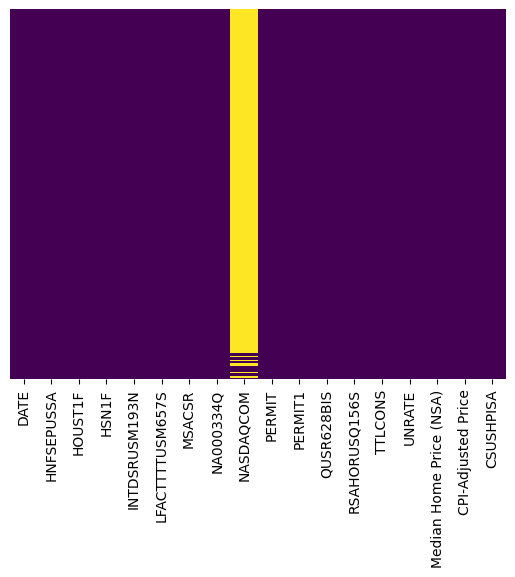

In [8]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

### Dropping the Columns that have lot of null values 

#### If the number of null values in the perticular colums is less and if there is a possibility that we might get meaningful relation then we can fill up the null columns with average of previous and post columns but that is not true in our case

In [9]:
df=df.drop(['NASDAQCOM'], axis=1)

### This correlation matrix helps us to visualize the relation between multiple variables.
#### The Dark blue box represents the positive or direct relation like if one variable increases the other one decreases. On the other hand the lighter box represents the negative or inverse relation like if one variable increases the other one decreases

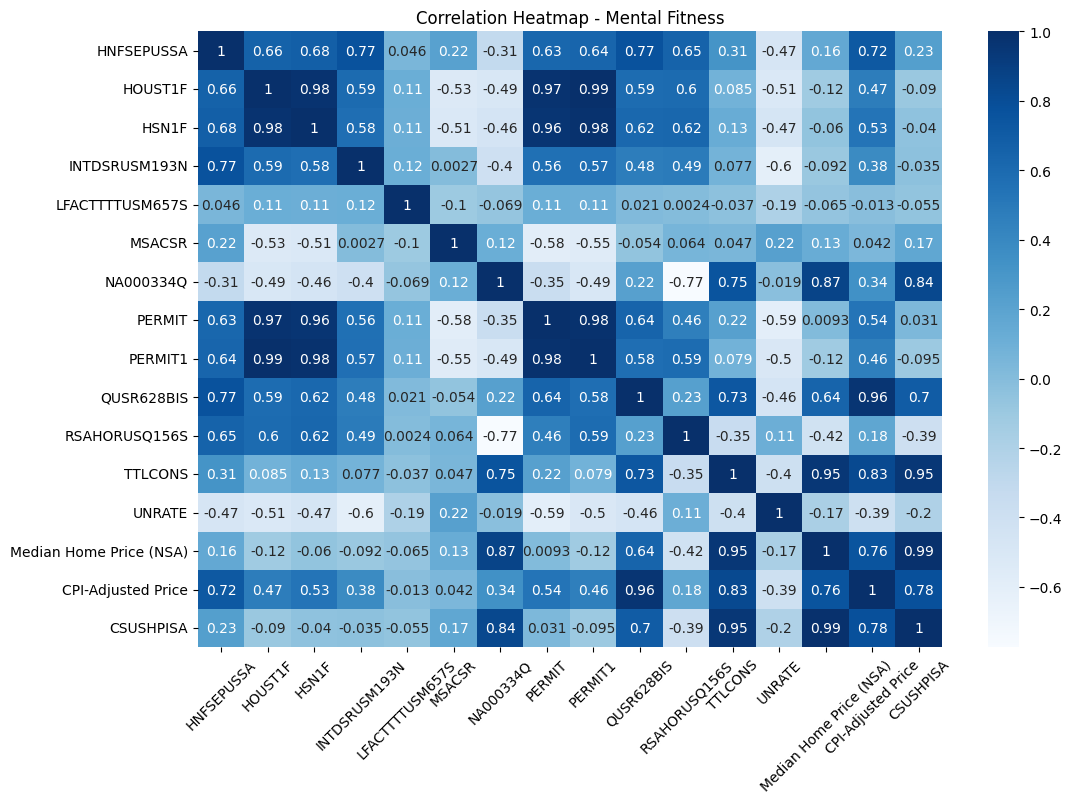

In [10]:
Corr = df.drop(['DATE'],axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(Corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap - Mental Fitness')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### In this pair plot each variable is plotted againg every other variable. In our case we can see some variables are plotted in linear structure from this we can generate individual prediction models from which can find less error in prediction.

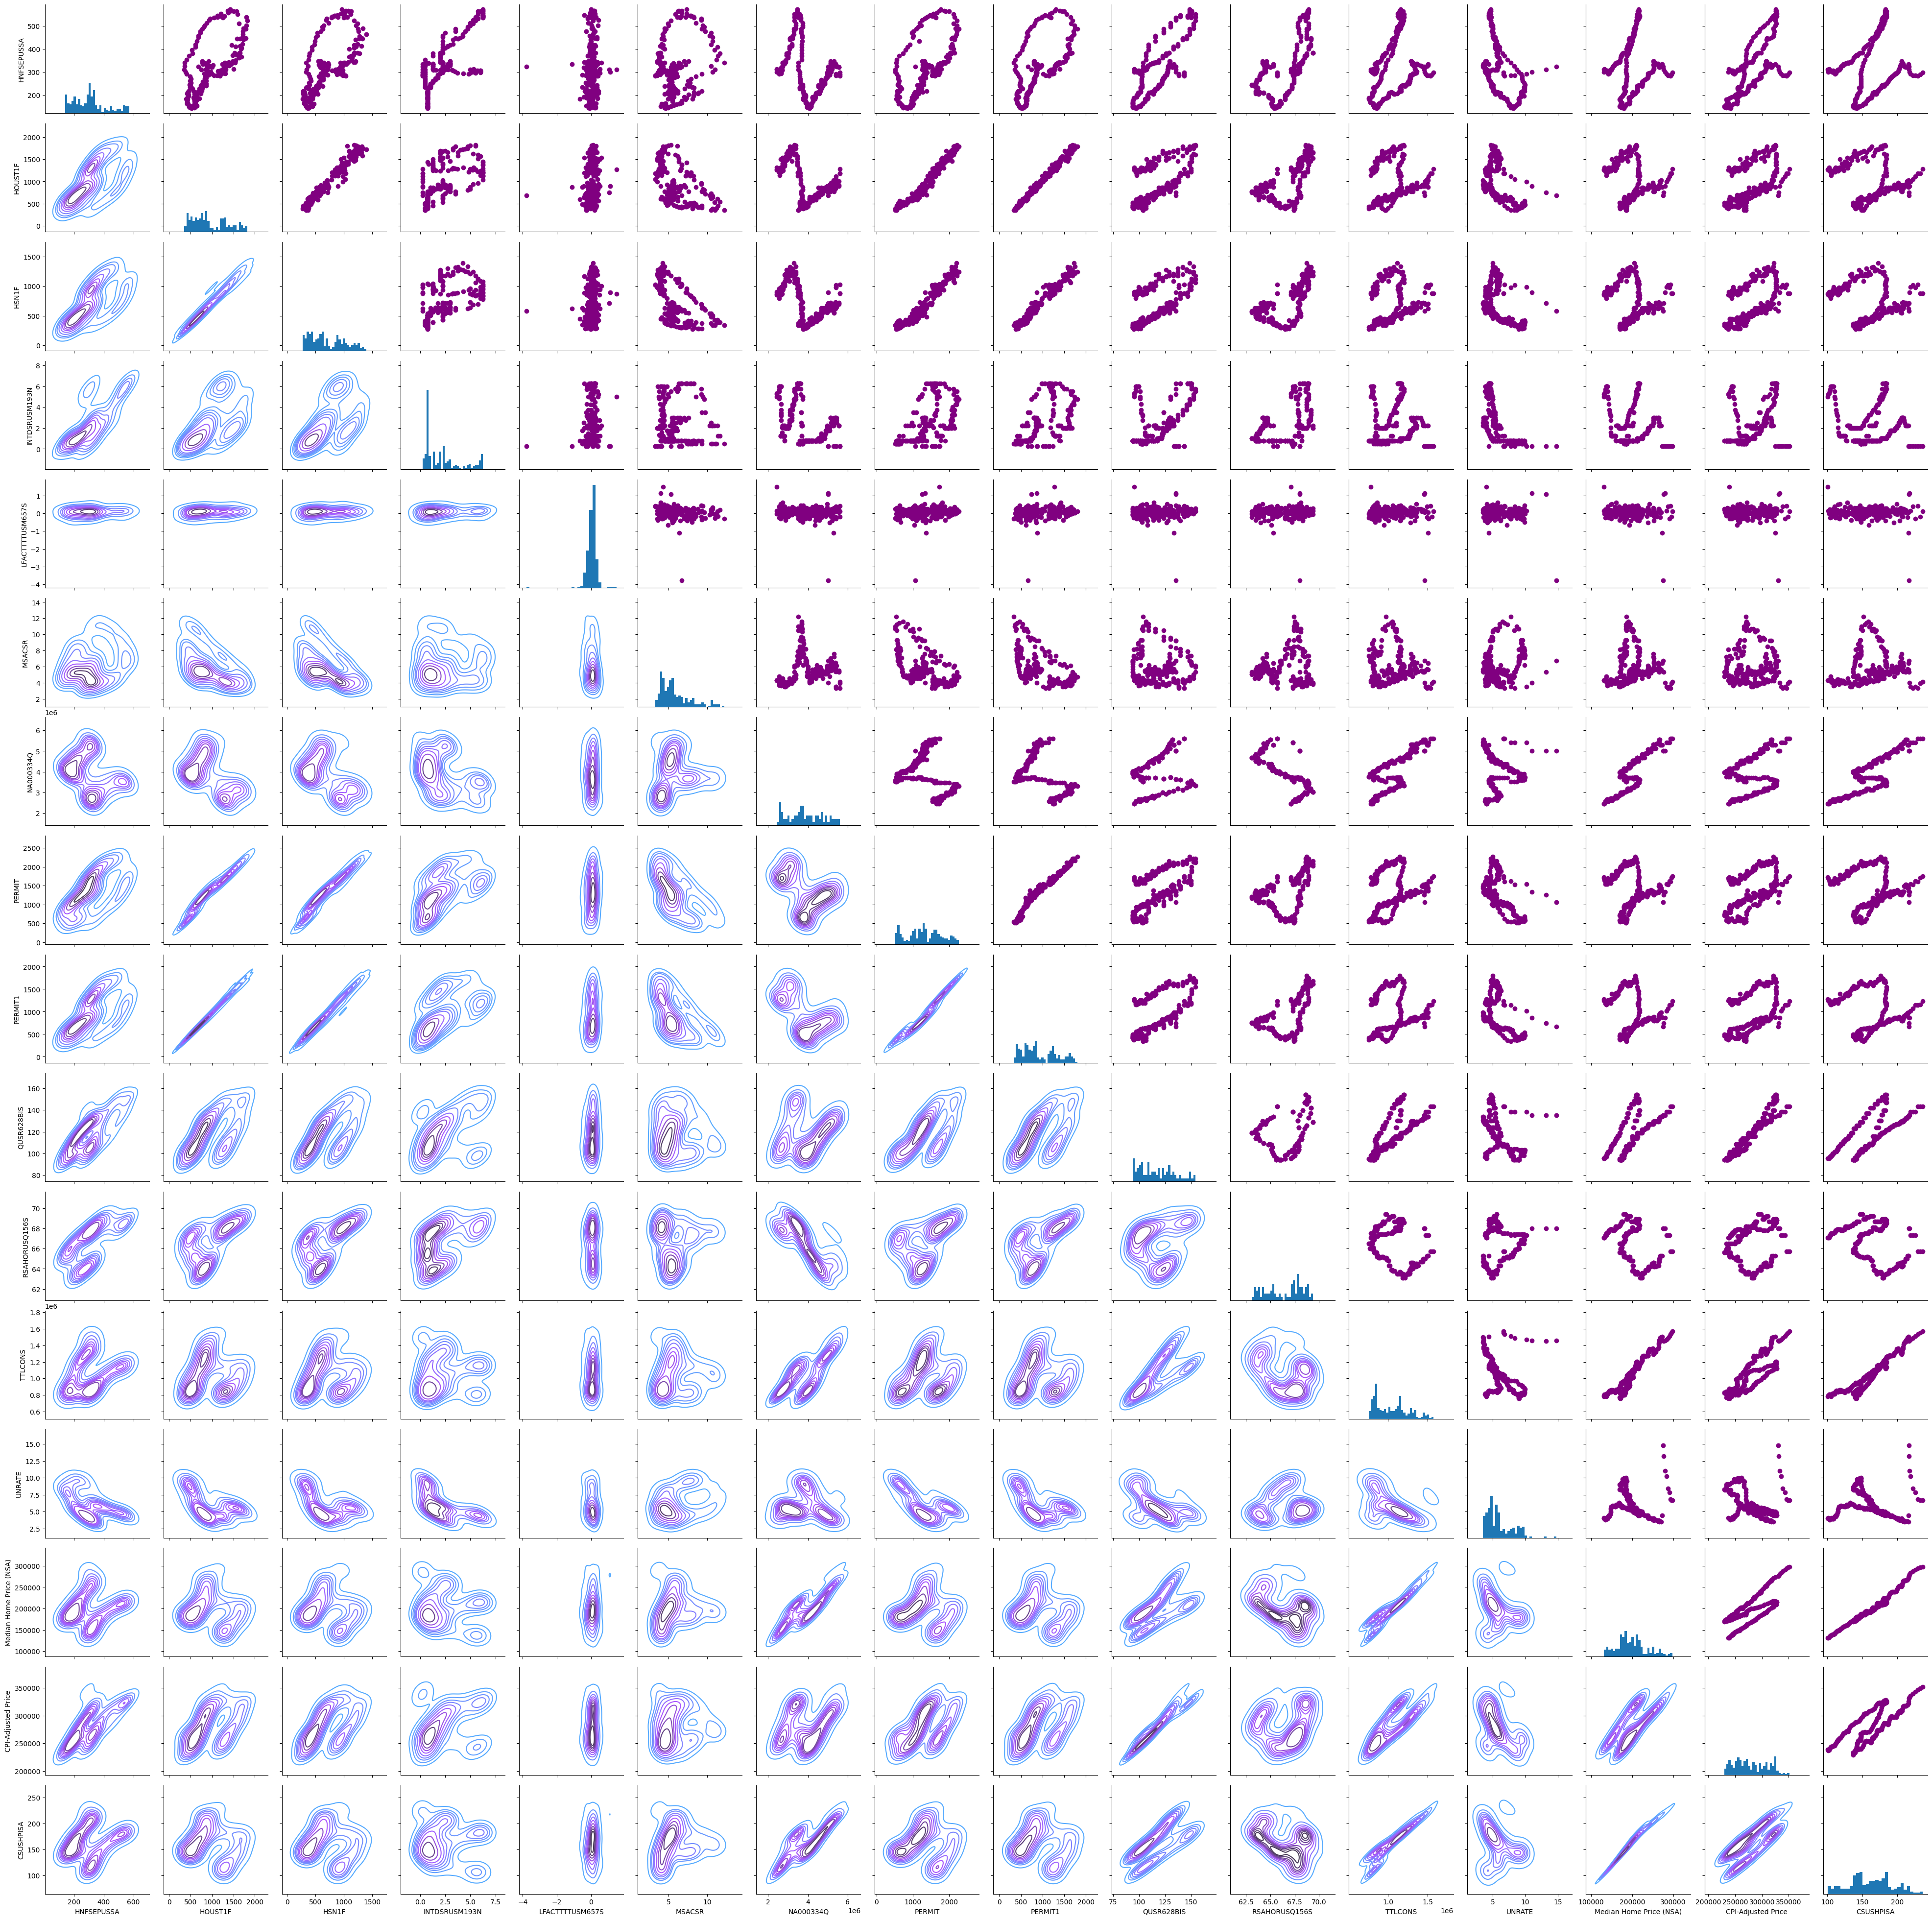

In [11]:
returns_fig1=sns.PairGrid(df)
returns_fig1.map_upper(plt.scatter, color='purple')
returns_fig1.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig1.map_diag(plt.hist, bins=30)

#### <i>Pair Plot generation can take some time</i>

### Data Preprocessing
#### Standardization

In [12]:
scaler=StandardScaler()
x_scaled= scaler.fit_transform(df.iloc[:,1:])
b=pd.DataFrame(x_scaled)
b.insert(0,'DATE', df['DATE'])
b.columns=df.columns
b.head()

DATE  HNFSEPUSSA   HOUST1F     HSN1F  INTDSRUSM193N  LFACTTTTUSM657S  \
0  2000-01-01    0.009370  0.768956  0.580699       1.512912         4.089444   
1  2000-02-01   -0.097149  0.736912  0.523920       1.643216         0.221500   
2  2000-03-01    0.027123  0.879880  0.670877       1.697509        -0.200837   
3  2000-04-01   -0.043890  0.786211  0.473821       1.784379         0.476996   
4  2000-05-01   -0.043890  0.675287  0.527260       1.898395        -0.881071   

     MSACSR  NA000334Q    PERMIT   PERMIT1  QUSR628BIS  RSAHORUSQ156S  \
0 -0.767119  -1.667580  0.863028  0.880839   -1.341800       0.340744   
1 -0.767119  -1.667580  0.788442  0.789809   -1.341800       0.340744   
2 -0.767119  -1.667580  0.701069  0.820152   -1.341800       0.340744   
3 -0.714900  -1.529262  0.585993  0.665907   -1.256896       0.448550   
4 -0.714900  -1.529262  0.470917  0.640621   -1.256896       0.448550   

    TTLCONS    UNRATE  Median Home Price (NSA)  CPI-Adjusted Price  CSUSHPISA  
0 -1.267663 -1.005798                -1.842330           -1.333216  -1.997123  
1 -1.225353 -0.955166                -1.848898           -1.393490  -1.971400  
2 -1.149736 -1.005798                -1.807651           -1.368500  -1.945678  
3 -1.172308 -1.107061                -1.772971           -1.298707  -1.919662  
4 -1.171158 -1.005798                -1.744334           -1.246556  -1.894953

### Visualizing distribution of each feature so that we can decide if we need any more data preprocessing like filling up values, normalization, etc.

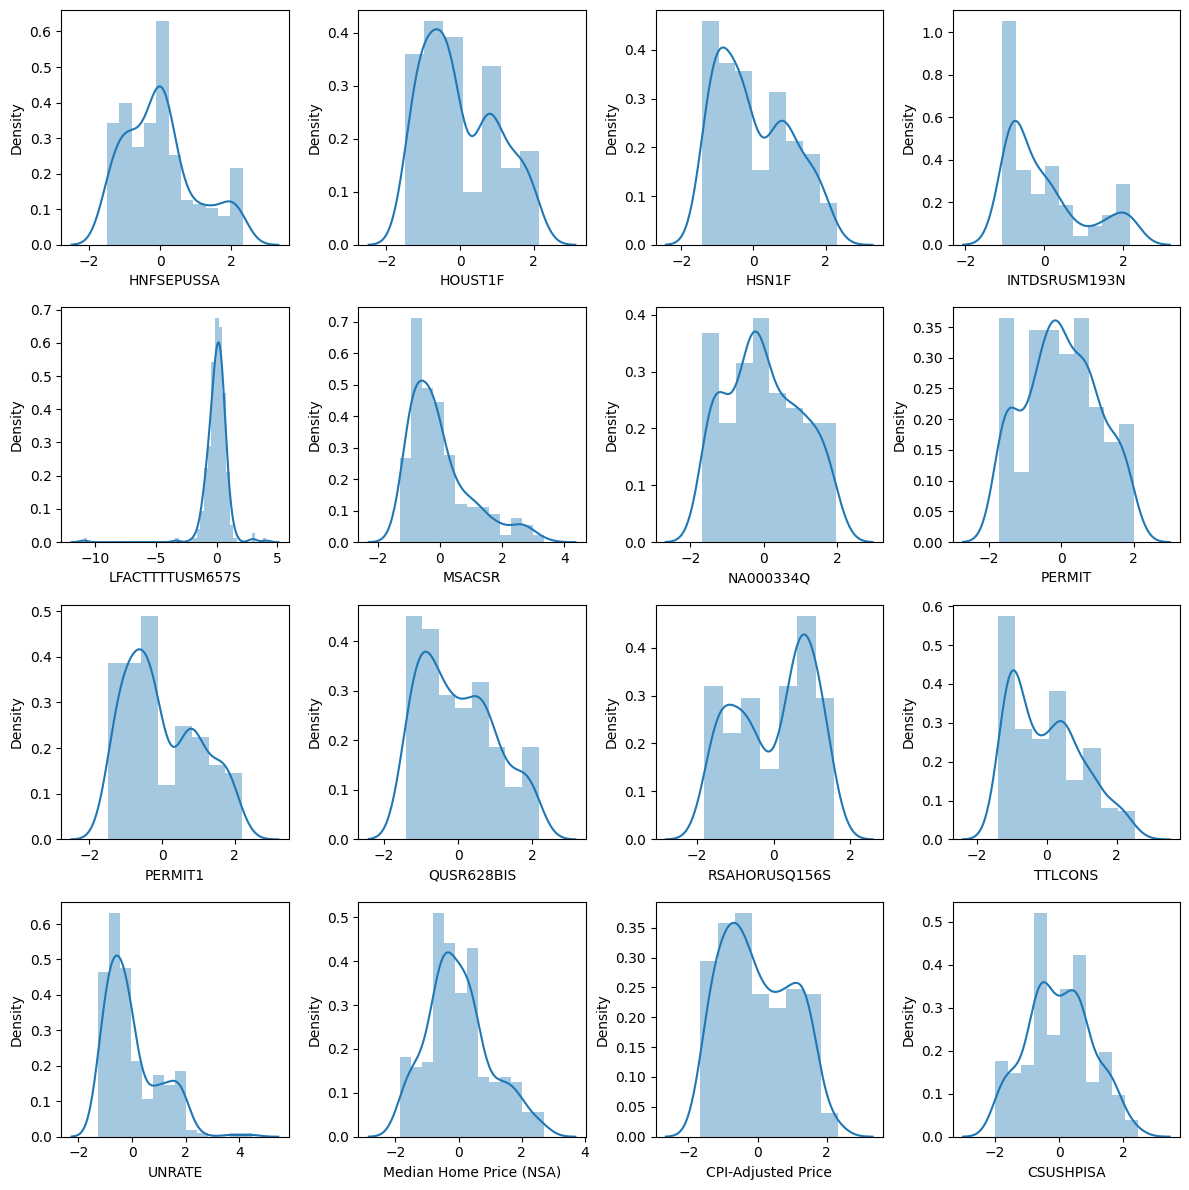

In [13]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

axes = axes.flatten()

for i in range(1, 17):
    sns.distplot(b.iloc[:, i], kde=True, ax=axes[i - 1])
    

for i in range(16, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

#### SimpleImputer is a univariate imputer that replaces missing values using simple strategies like replace missing values with the mean, median, most frequent and constant along each column

In [14]:
df['DATE'] = pd.to_datetime(df['DATE'])

imputer = SimpleImputer(strategy='mean')
df['INTDSRUSM193N'] = imputer.fit_transform(df[['INTDSRUSM193N']])

df = df.reset_index(drop=True)

correlation = df.corr()['CSUSHPISA']
correlation_table = pd.DataFrame(correlation).reset_index()
correlation_table.columns = ['Factors', 'Correlation with CSUSHPISA']
print(correlation_table)

                    Factors  Correlation with CSUSHPISA
0                      DATE                    0.789483
1                HNFSEPUSSA                    0.231465
2                   HOUST1F                   -0.089564
3                     HSN1F                   -0.039903
4             INTDSRUSM193N                   -0.034889
5           LFACTTTTUSM657S                   -0.054888
6                    MSACSR                    0.173284
7                 NA000334Q                    0.836083
8                    PERMIT                    0.030764
9                   PERMIT1                   -0.095456
10               QUSR628BIS                    0.699924
11            RSAHORUSQ156S                   -0.388745
12                  TTLCONS                    0.945673
13                   UNRATE                   -0.204129
14  Median Home Price (NSA)                    0.988805
15       CPI-Adjusted Price                    0.783099
16                CSUSHPISA                    1

### Plotting individual features that are supposed to have high positive or negative correlation

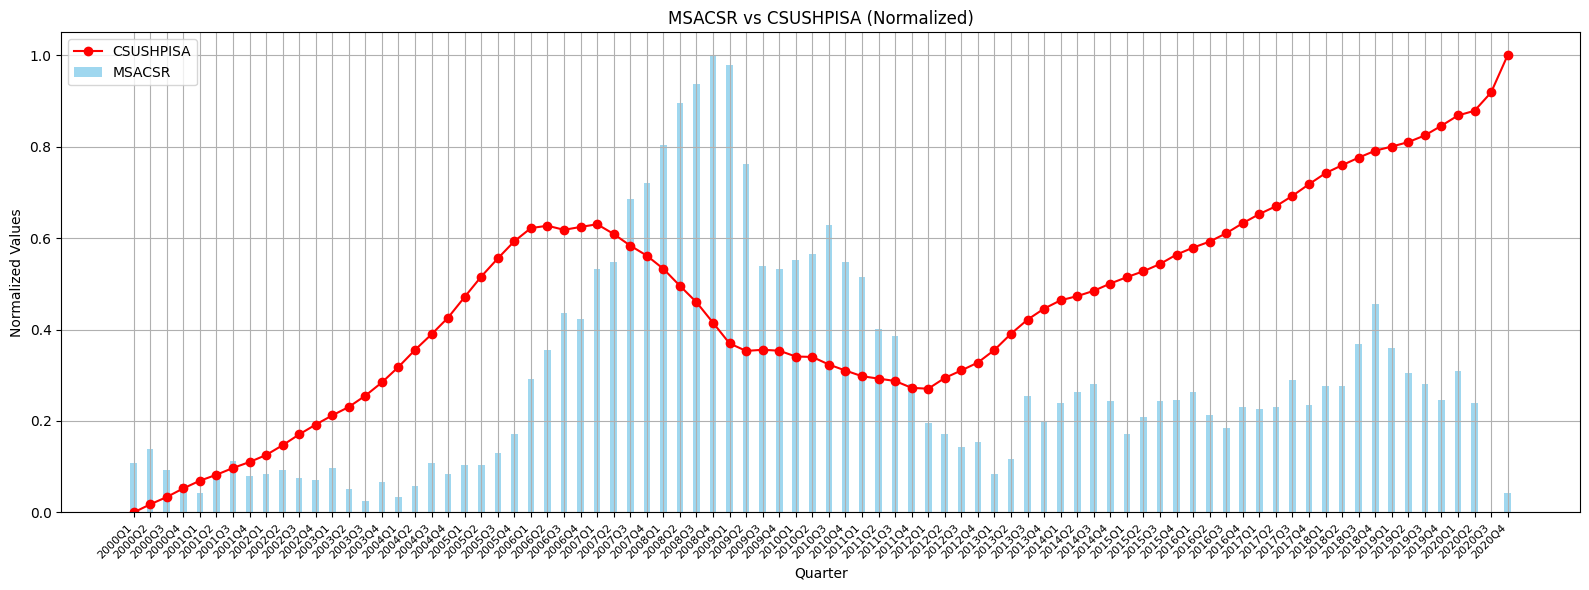

In [15]:
df['MSACSR'] = pd.to_numeric(df['MSACSR'], errors='coerce')
df['PERMIT'] = pd.to_numeric(df['PERMIT'], errors='coerce')

df.set_index('DATE', inplace=True)


df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)


grouped_data = df.groupby('QUARTER').agg({'MSACSR': 'sum', 'CSUSHPISA': 'mean'}).reset_index()


scaler = MinMaxScaler()
grouped_data[['MSACSR', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['MSACSR', 'CSUSHPISA']])


grouped_data = grouped_data.sort_values('QUARTER')


plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8


plt.bar(grouped_data['QUARTER'], grouped_data['MSACSR'], width=bar_width, alpha=opacity, color='skyblue', label='MSACSR')


plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

plt.title('MSACSR vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True) 
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

plt.tight_layout()
plt.show()

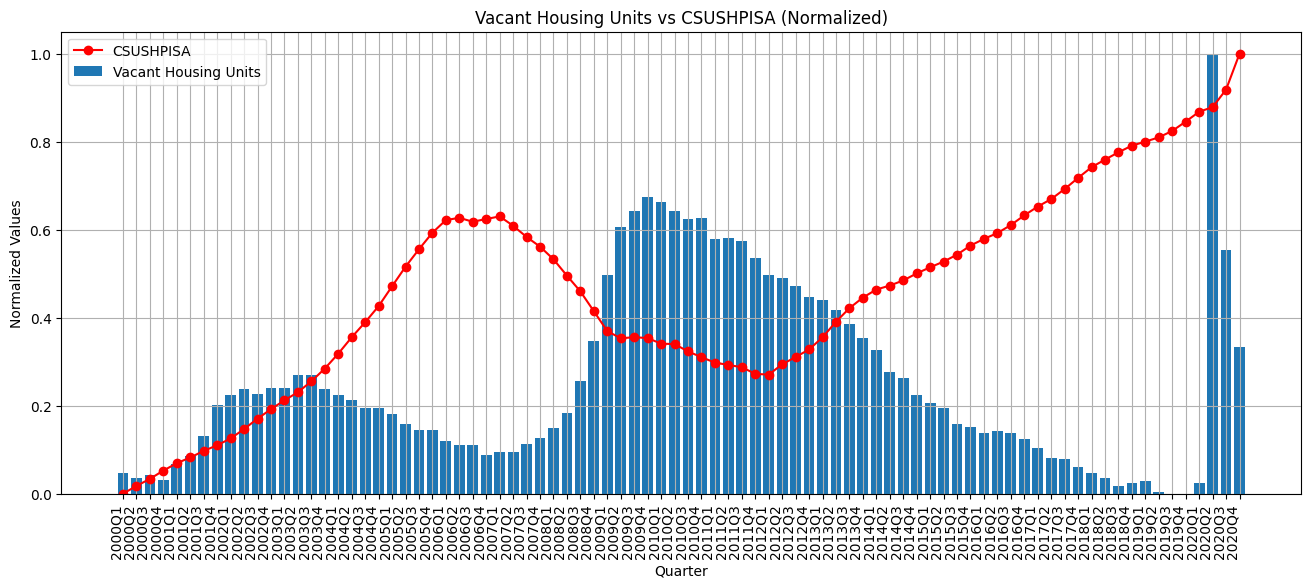

In [16]:
df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum of UNRATE and the average of CSUSHPISA for each quarter
grouped_data = df.groupby('QUARTER').agg({'UNRATE': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['UNRATE', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['UNRATE', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

plt.bar(grouped_data['QUARTER'], grouped_data['UNRATE'], label='Vacant Housing Units')
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='r', label='CSUSHPISA')

plt.title('Vacant Housing Units vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=90, ha='right')  # Rotate and align x-axis tick labels for better readability
plt.show()

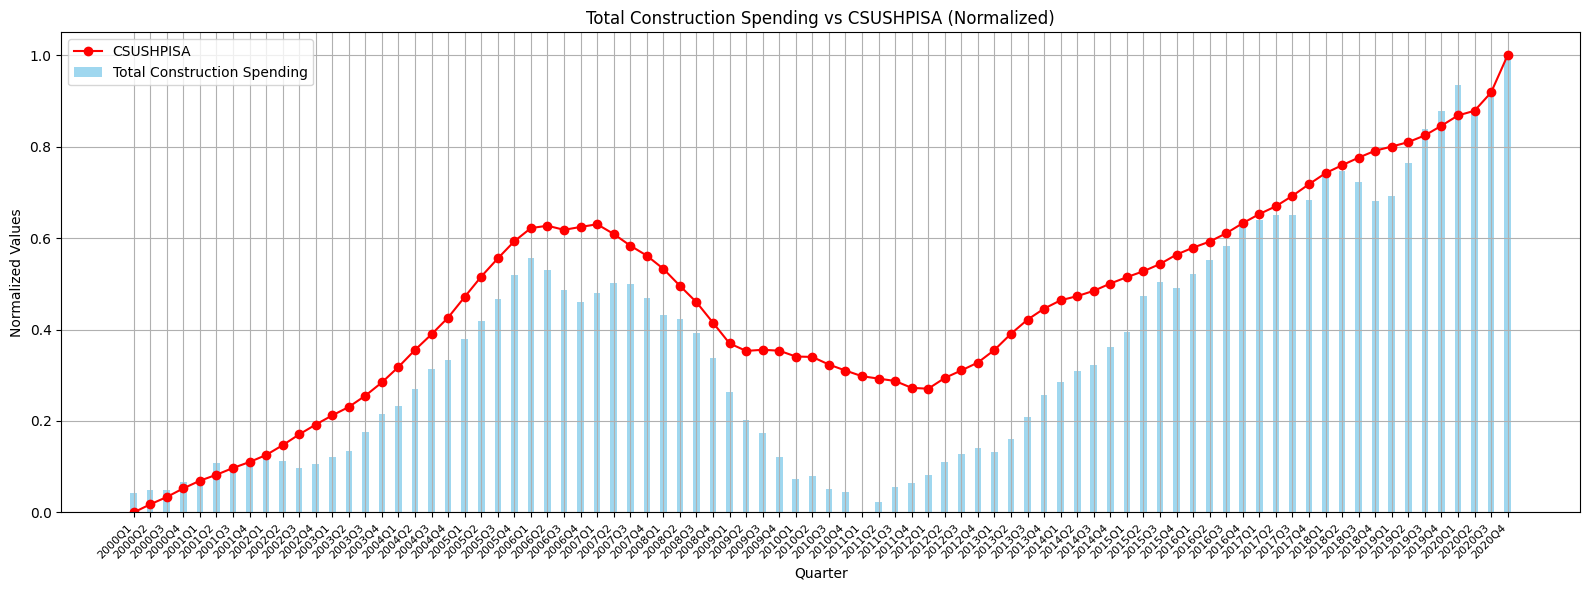

In [17]:
df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum of TTLCONS and the average of CSUSHPISA for each quarter
grouped_data = df.groupby('QUARTER').agg({'TTLCONS': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['TTLCONS', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['TTLCONS', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for TTLCONS (New Housing Units Authorized)
plt.bar(grouped_data['QUARTER'], grouped_data['TTLCONS'], width=bar_width, alpha=opacity, color='skyblue', label='Total Construction Spending')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

plt.title('Total Construction Spending vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

plt.tight_layout()  # Ensure all elements fit into the figure area
plt.show()

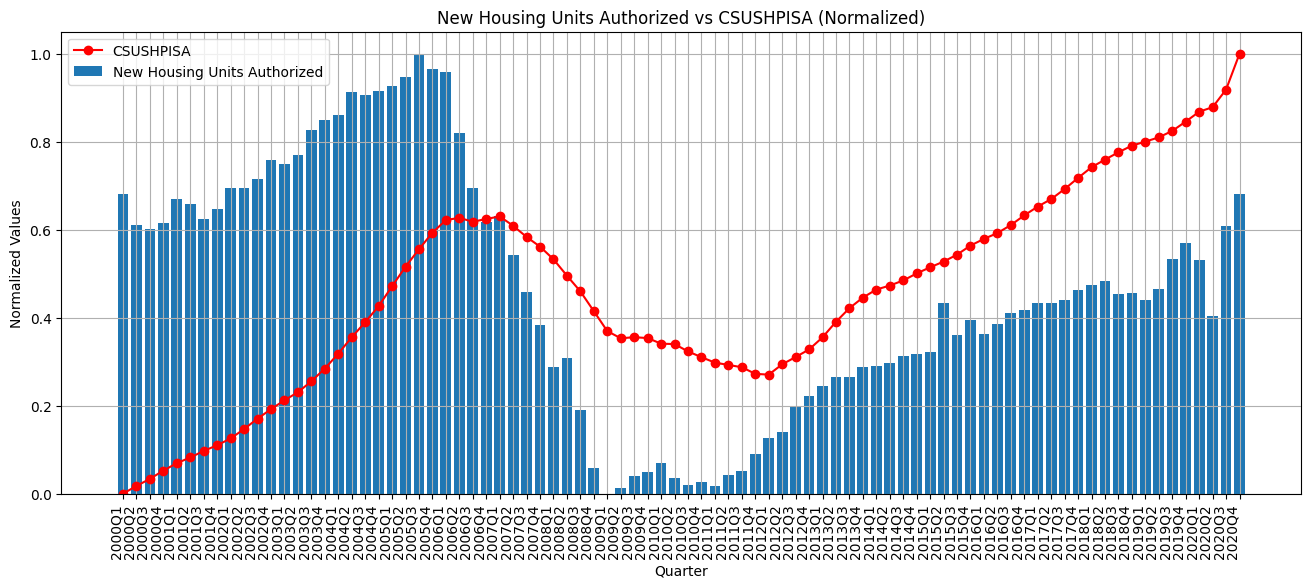

In [18]:
df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum of PERMIT and the average of CSUSHPISA for each quarter
grouped_data = df.groupby('QUARTER').agg({'PERMIT': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['PERMIT', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['PERMIT', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

plt.bar(grouped_data['QUARTER'], grouped_data['PERMIT'], label='New Housing Units Authorized')
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='r', label='CSUSHPISA')

plt.title('New Housing Units Authorized vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=90, ha='right')  # Rotate and align x-axis tick labels for better readability

plt.show()

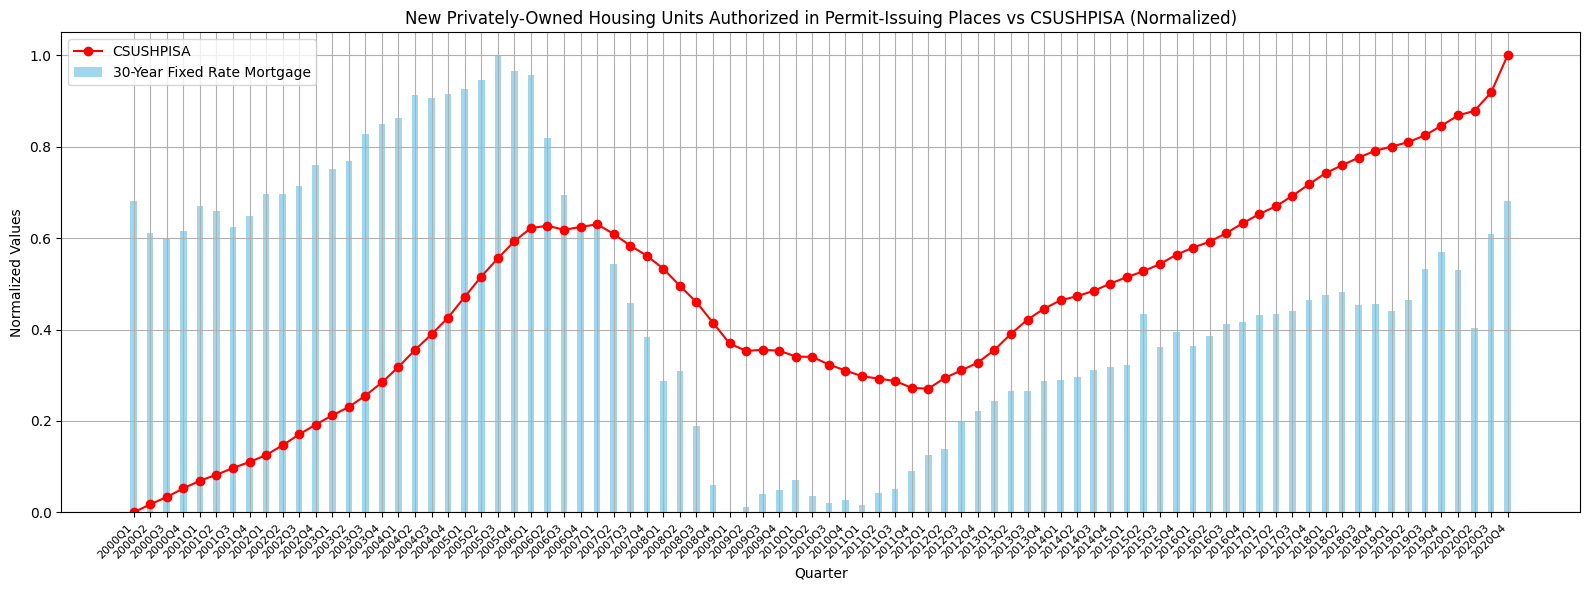

In [19]:
df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum of PERMIT and the average of CSUSHPISA for each quarter
grouped_data = df.groupby('QUARTER').agg({'PERMIT': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['PERMIT', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['PERMIT', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for PERMIT
plt.bar(grouped_data['QUARTER'], grouped_data['PERMIT'], width=bar_width, alpha=opacity, color='skyblue', label='30-Year Fixed Rate Mortgage')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

plt.title('New Privately-Owned Housing Units Authorized in Permit-Issuing Places vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

plt.tight_layout()  # Ensure all elements fit into the figure area
plt.show()

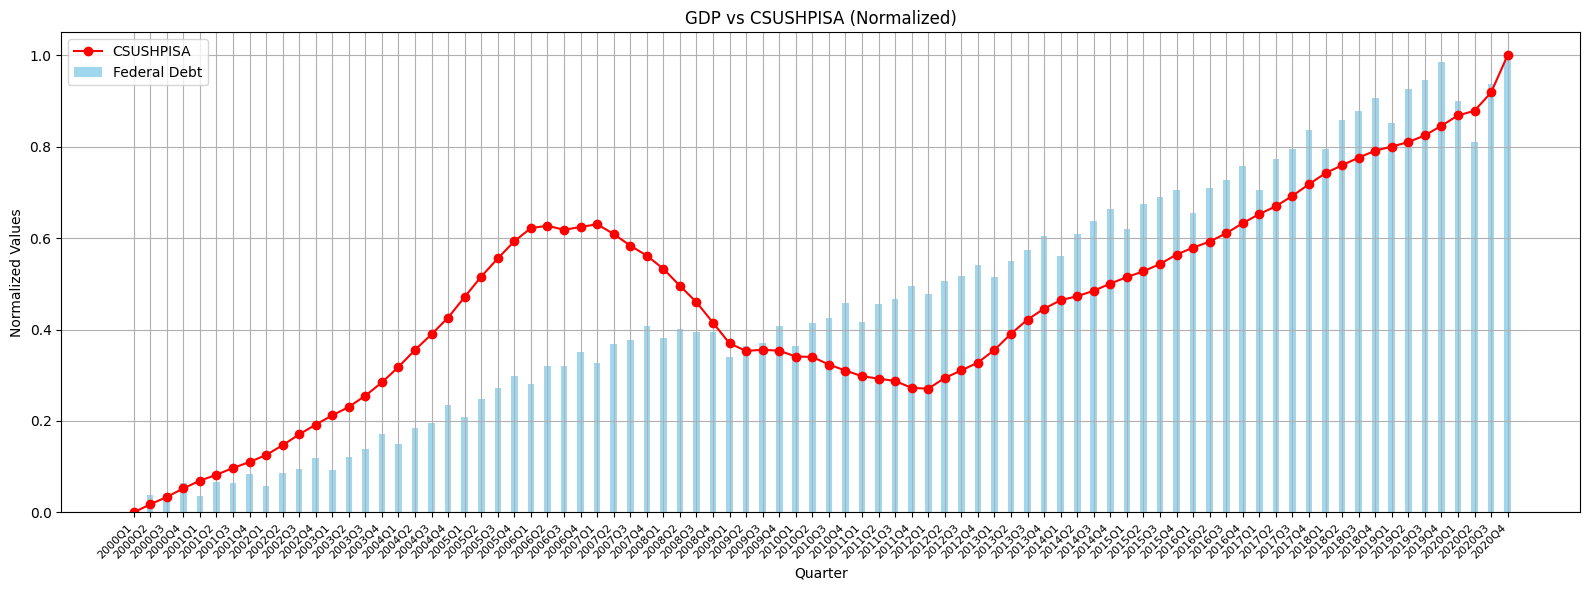

In [20]:
df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum of GFDEGDQ188S and the average of CSUSHPISA for each quarter
grouped_data = df.groupby('QUARTER').agg({'NA000334Q': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['NA000334Q', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['NA000334Q', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for GFDEGDQ188S
plt.bar(grouped_data['QUARTER'], grouped_data['NA000334Q'], width=bar_width, alpha=opacity, color='skyblue', label='Federal Debt')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

plt.title('GDP vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

plt.tight_layout()  # Ensure all elements fit into the figure area
plt.show()

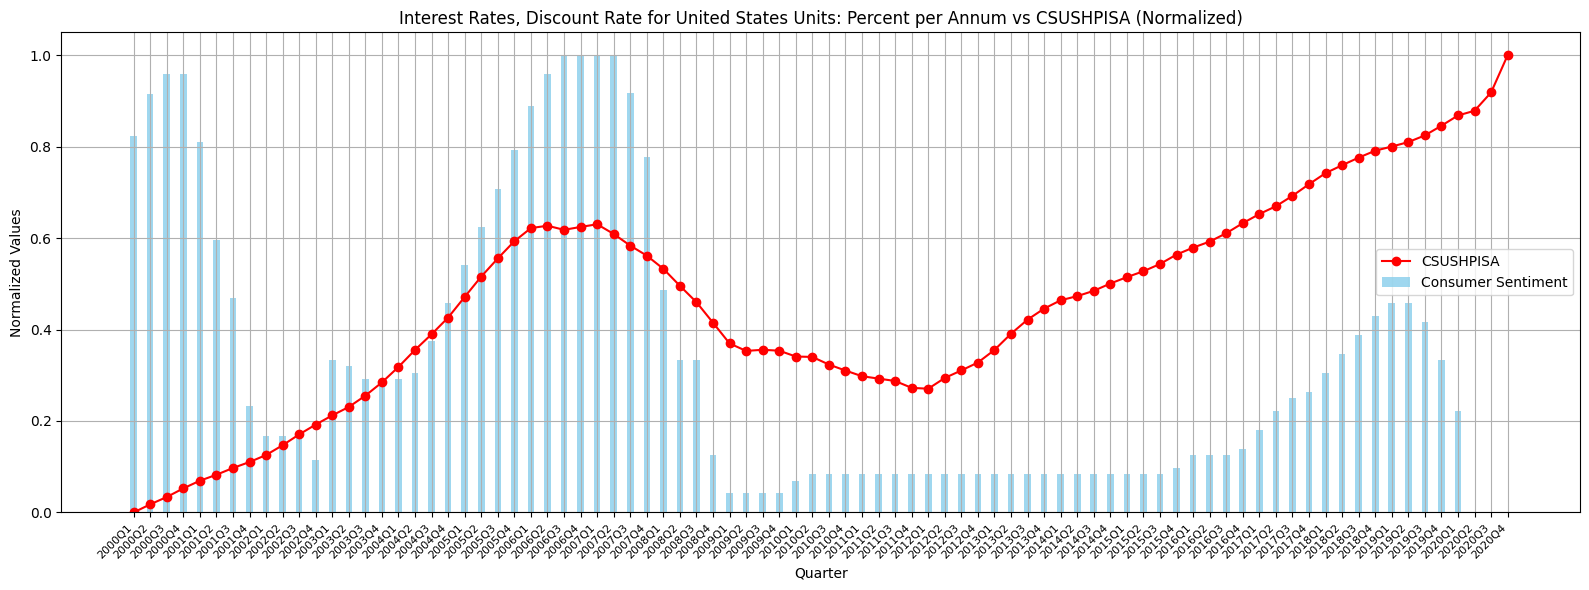

In [21]:
df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum of INTDSRUSM193N and the average of CSUSHPISA for each quarter
grouped_data = df.groupby('QUARTER').agg({'INTDSRUSM193N': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['INTDSRUSM193N', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['INTDSRUSM193N', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for INTDSRUSM193N
plt.bar(grouped_data['QUARTER'], grouped_data['INTDSRUSM193N'], width=bar_width, alpha=opacity, color='skyblue', label='Consumer Sentiment')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

plt.title('Interest Rates, Discount Rate for United States Units: Percent per Annum vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

plt.tight_layout()  # Ensure all elements fit into the figure area
plt.show()

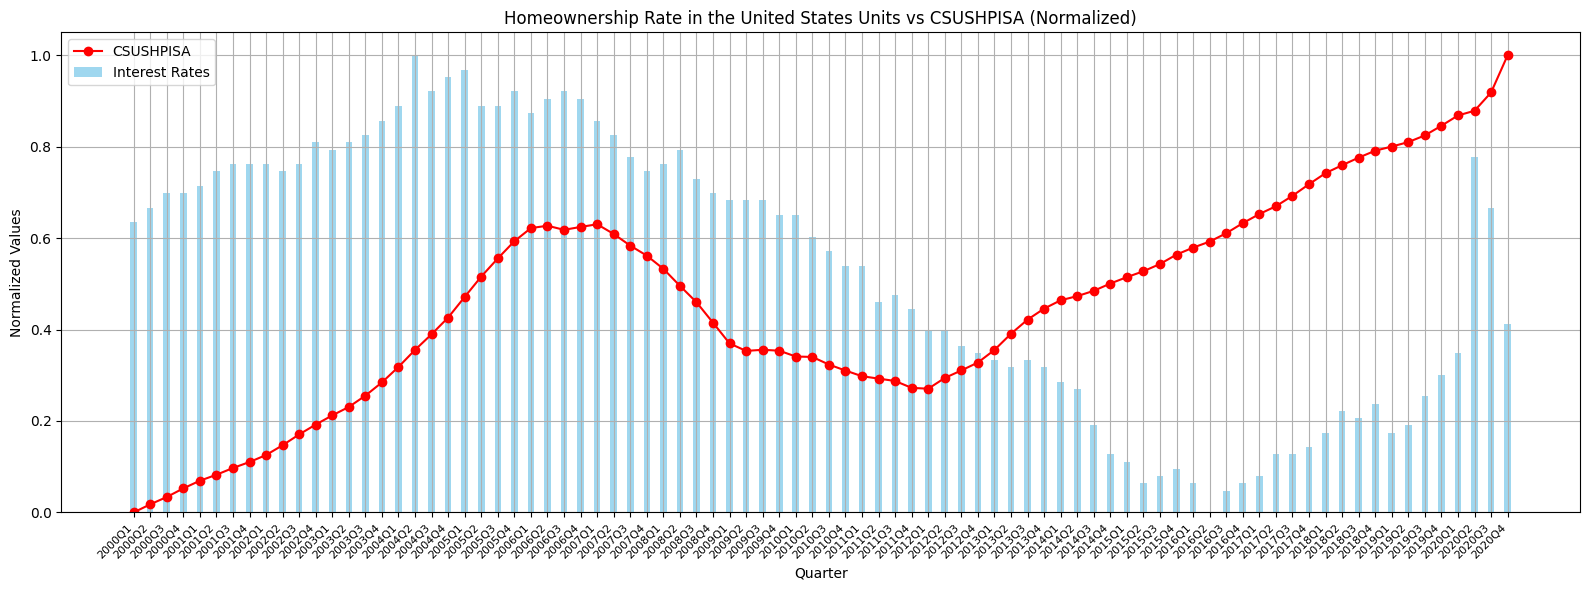

In [22]:
df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum of RSAHORUSQ156S and the average of CSUSHPISA for each quarter
grouped_data = df.groupby('QUARTER').agg({'RSAHORUSQ156S': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['RSAHORUSQ156S', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['RSAHORUSQ156S', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for RSAHORUSQ156S
plt.bar(grouped_data['QUARTER'], grouped_data['RSAHORUSQ156S'], width=bar_width, alpha=opacity, color='skyblue', label='Interest Rates')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

plt.title('Homeownership Rate in the United States Units vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

plt.tight_layout()  # Ensure all elements fit into the figure area
plt.show()

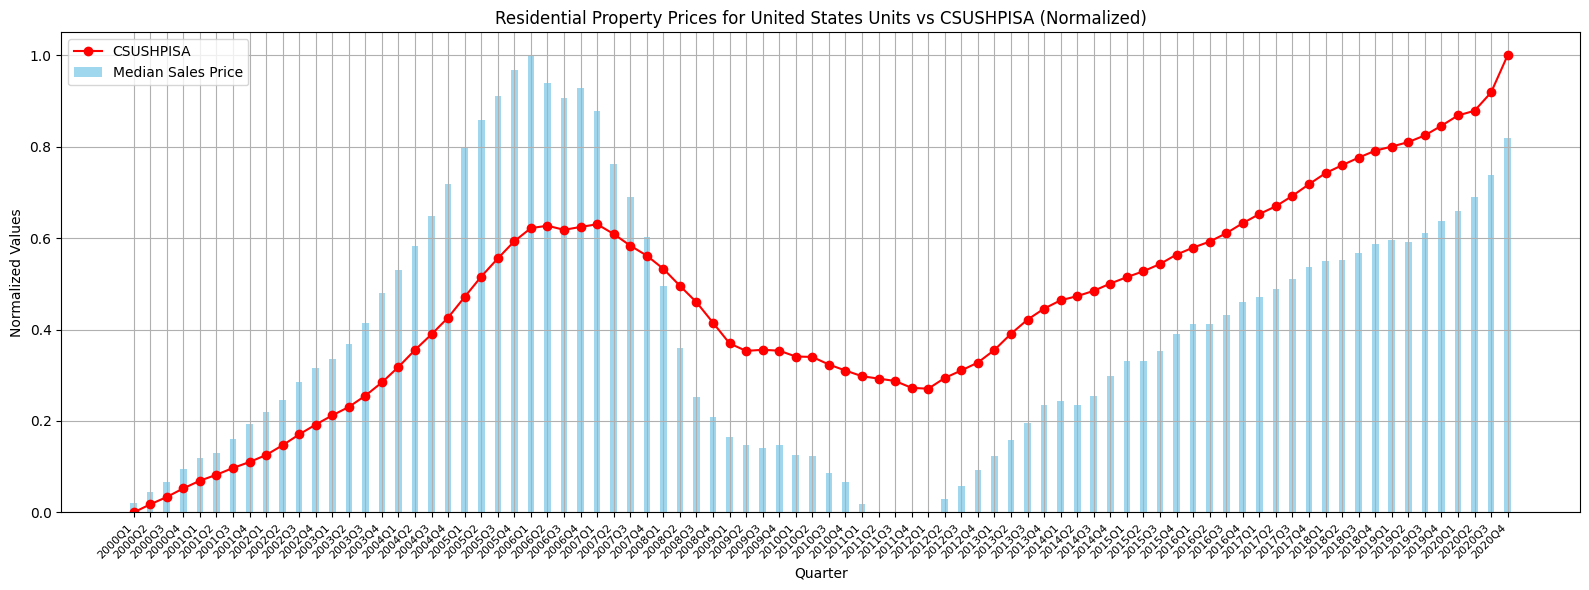

In [23]:
df['QUARTER'] = df.index.to_period('Q')
df['QUARTER'] = df['QUARTER'].astype(str)  # Convert 'QUARTER' values to strings

# Group the data by quarter and calculate the sum of QUSR628BIS and the average of CSUSHPISA for each quarter
grouped_data = df.groupby('QUARTER').agg({'QUSR628BIS': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['QUSR628BIS', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['QUSR628BIS', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Plotting the bar chart
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for QUSR628BIS
plt.bar(grouped_data['QUARTER'], grouped_data['QUSR628BIS'], width=bar_width, alpha=opacity, color='skyblue', label='Median Sales Price')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

plt.title('Residential Property Prices for United States Units vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

plt.grid(True)  # Add gridlines
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis tick labels for better readability

plt.tight_layout()  # Ensure all elements fit into the figure area
plt.show()

### Splitting the dataset into test and train

In [24]:
features = ['HNFSEPUSSA', 'HOUST1F', 'HSN1F', 'INTDSRUSM193N',
       'LFACTTTTUSM657S', 'MSACSR', 'NA000334Q', 'PERMIT',
       'PERMIT1', 'QUSR628BIS', 'RSAHORUSQ156S', 'TTLCONS', 'UNRATE']
target = 'CSUSHPISA'

x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


### Storing the error and accuracy of all the predicted results

In [25]:
Error = {}
Accuracy = {}

### Training the data in different types of regression models

In [26]:
# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(x_train, y_train)
forest_y_pred = forest_model.predict(x_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_rmse = (np.sqrt(mean_squared_error(y_test, forest_y_pred)))
forest_r2 = r2_score(y_test, forest_y_pred)
Error['Random Forest Regression']=forest_rmse
Accuracy['Random Forest Regression']=forest_r2

In [27]:
# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)
gb_y_pred = gb_model.predict(x_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = (np.sqrt(mean_squared_error(y_test, gb_y_pred)))
gb_r2 = r2_score(y_test, gb_y_pred)
Error['Gradient Boosting Regression']=gb_rmse
Accuracy['Gradient Boosting Regression']=gb_r2

In [28]:
# Ridge Regression
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(x_train, y_train)
ridge_y_pred = ridge_model.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_rmse = (np.sqrt(mean_squared_error(y_test, ridge_y_pred)))
ridge_r2 = r2_score(y_test, ridge_y_pred)
Error['Ridge Regression']=ridge_rmse
Accuracy['Ridge Regression']=ridge_r2

In [29]:
# Lasso Regression
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(x_train, y_train)
lasso_y_pred = lasso_model.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_rmse = (np.sqrt(mean_squared_error(y_test, lasso_y_pred)))
lasso_r2 = r2_score(y_test, lasso_y_pred)
Error['Lasso Regression']=lasso_rmse
Accuracy['Lasso Regression']=lasso_r2

In [30]:
# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net_model.fit(x_train, y_train)
elastic_net_y_pred = elastic_net_model.predict(x_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_y_pred)
elastic_net_rmse = (np.sqrt(mean_squared_error(y_test, elastic_net_y_pred)))
elastic_net_r2 = r2_score(y_test, elastic_net_y_pred)
Error['Elastic Net Regression']=elastic_net_rmse
Accuracy['Elastic Net Regression']=elastic_net_r2

In [31]:
# Neural Network Regression
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(x_train, y_train)
nn_y_pred = nn_model.predict(x_test)
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_rmse = (np.sqrt(mean_squared_error(y_test, nn_y_pred)))
nn_r2 = r2_score(y_test, nn_y_pred)
Error['Neural Network Regression']=nn_rmse
Accuracy['Neural Network Regression']=nn_r2

In [32]:
# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)
tree_y_pred = tree_model.predict(x_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_rmse = (np.sqrt(mean_squared_error(y_test, tree_y_pred)))
tree_r2 = r2_score(y_test, tree_y_pred)
Error['Decision Tree Regression']=tree_rmse
Accuracy['Decision Tree Regression']=tree_r2

In [33]:
# Bayesian Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(x_train, y_train)
bayesian_y_pred = bayesian_model.predict(x_test)
bayesian_mse = mean_squared_error(y_test, bayesian_y_pred)
bayesian_rmse = (np.sqrt(mean_squared_error(y_test, bayesian_y_pred)))
bayesian_r2 = r2_score(y_test, bayesian_y_pred)
Error['Bayesian Regression']=bayesian_rmse
Accuracy['Bayesian Regression']=bayesian_r2

In [34]:
# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_rmse = (np.sqrt(mean_squared_error(y_test, knn_y_pred)))
knn_r2 = r2_score(y_test, knn_y_pred)

Error['K-Nearest Neighbors Regression']=knn_rmse
Accuracy['K-Nearest Neighbors Regression']=knn_r2

In [35]:
# XGBoost Regression
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(x_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = (np.sqrt(mean_squared_error(y_test, xgb_y_pred)))
xgb_r2 = r2_score(y_test, xgb_y_pred)

Error['XGBoost Regression']=xgb_rmse
Accuracy['XGBoost Regression']=xgb_r2

In [36]:
# SVR (Support Vector Regression)
svr_model = SVR()
svr_model.fit(x_train, y_train)
svr_y_pred = svr_model.predict(x_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_rmse = (np.sqrt(mean_squared_error(y_test, svr_y_pred)))
svr_r2 = r2_score(y_test, svr_y_pred)

Error['SVR']=svr_rmse
Accuracy['SVR']=svr_r2

In [37]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(x_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
X_test_poly = poly_features.transform(x_test)
poly_y_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_rmse = (np.sqrt(mean_squared_error(y_test, poly_y_pred)))
poly_r2 = r2_score(y_test, poly_y_pred)

Error['Polynomial Regression']=poly_rmse
Accuracy['Polynomial Regression']=poly_r2

In [38]:
#SGDRegressor
from sklearn.preprocessing import StandardScaler
SGDRegressor_model = SGDRegressor(loss="huber", penalty="l1")
SGDRegressor_model.fit(x_train, y_train)
SGDRegressor_y_pred = SGDRegressor_model.predict(x_test)
SGDRegressor_mse = mean_squared_error(y_test, SGDRegressor_y_pred)
SGDRegressor_rmse = (np.sqrt(mean_squared_error(y_test, SGDRegressor_y_pred)))
SGDRegressor_r2 = r2_score(y_test, SGDRegressor_y_pred)

Error['SGDRegressor']=SGDRegressor_rmse
Accuracy['SGDRegressor']=SGDRegressor_r2

In [39]:
#CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=50, learning_rate=0.2, depth=15)
catboost_model.fit(x_train, y_train)
catboost_y_pred = catboost_model.predict(x_test)
catboost_mse = mean_squared_error(y_test, catboost_y_pred)
catboost_rmse = (np.sqrt(mean_squared_error(y_test, catboost_y_pred)))
catboost_r2 = r2_score(y_test, catboost_y_pred)

Error['CatBoostRegressor']=catboost_rmse
Accuracy['CatBoostRegressor']=catboost_r2

0:	learn: 26.4550547	total: 452ms	remaining: 22.2s
1:	learn: 22.7144413	total: 765ms	remaining: 18.4s
2:	learn: 19.5961333	total: 842ms	remaining: 13.2s
3:	learn: 16.9513896	total: 1.02s	remaining: 11.7s
4:	learn: 15.2166822	total: 1.4s	remaining: 12.6s
5:	learn: 13.0371301	total: 1.77s	remaining: 13s
6:	learn: 11.5847396	total: 2.1s	remaining: 12.9s
7:	learn: 10.5413280	total: 2.45s	remaining: 12.9s
8:	learn: 9.6173061	total: 2.76s	remaining: 12.6s
9:	learn: 8.5898646	total: 3.1s	remaining: 12.4s
10:	learn: 7.5846726	total: 3.1s	remaining: 11s
11:	learn: 6.8267410	total: 3.5s	remaining: 11.1s
12:	learn: 6.0314210	total: 3.84s	remaining: 10.9s
13:	learn: 5.4249990	total: 4.18s	remaining: 10.8s
14:	learn: 4.8944440	total: 4.38s	remaining: 10.2s
15:	learn: 4.4024604	total: 4.38s	remaining: 9.32s
16:	learn: 3.9293126	total: 4.7s	remaining: 9.13s
17:	learn: 3.6557681	total: 4.74s	remaining: 8.43s
18:	learn: 3.4079968	total: 5.06s	remaining: 8.25s
19:	learn: 3.1462200	total: 5.08s	remaining

In [40]:
#KernelRidge
kernel_ridge_model = KernelRidge(alpha=1.0)
kernel_ridge_model.fit(x_train, y_train)
kernel_ridge_y_pred = kernel_ridge_model.predict(x_test)
kernel_ridge_mse = mean_squared_error(y_test, kernel_ridge_y_pred)
kernel_ridge_rmse = (np.sqrt(mean_squared_error(y_test, kernel_ridge_y_pred)))
kernel_ridge_r2 = r2_score(y_test, kernel_ridge_y_pred)

Error['KernelRidge']=kernel_ridge_rmse
Accuracy['KernelRidge']=kernel_ridge_r2

### Verifying if the values are saved

In [41]:
print(Error)
print(Accuracy)

{'Random Forest Regression': 1.4994160137075965, 'Gradient Boosting Regression': 1.7832579090748255, 'Ridge Regression': 1.7945170119172587, 'Lasso Regression': 2.0162576184487984, 'Elastic Net Regression': 1.9342694318516183, 'Neural Network Regression': 188.21490098233804, 'Decision Tree Regression': 2.6002008934454484, 'Bayesian Regression': 1.8067967441409523, 'K-Nearest Neighbors Regression': 3.192851032062278, 'XGBoost Regression': 2.1891494548267594, 'SVR': 22.966575041456572, 'Polynomial Regression': 1.8886443151550931, 'SGDRegressor': 75124001.16578043, 'CatBoostRegressor': 4.978664683521941, 'KernelRidge': 1.869142096694078}
{'Random Forest Regression': 0.9973467037914808, 'Gradient Boosting Regression': 0.9962470760436535, 'Ridge Regression': 0.9961995361453445, 'Lasso Regression': 0.9952022955638032, 'Elastic Net Regression': 0.9955845458045324, 'Neural Network Regression': -40.80704327727866, 'Decision Tree Regression': 0.9920208752849347, 'Bayesian Regression': 0.99614734

### Creating dataset to visualize the models results

In [42]:
Model_Selection=pd.DataFrame({'Model':['Random Forest Regression', 'Polynomial Regression', 'Stochastic Gradient Descent Regression','Support Vector Regression', 'XGBoost Regression', 'Cat Boost Regression', 'K-Nearest Neighbors Regression', 'Bayesian Regression', 'Decision Tree Regression', 'Neural Network Regression', 'Gradient Boosting Regression', 'Ridge Regression', 'Kernel Ridge Regression', 'Lasso Regression', 'Elastic Net Regression'],
                              'RMSE':[forest_rmse, poly_rmse, SGDRegressor_rmse, svr_rmse, xgb_rmse, catboost_rmse, knn_rmse,  bayesian_rmse, tree_rmse, nn_rmse, gb_rmse, ridge_rmse, kernel_ridge_rmse, lasso_rmse, elastic_net_rmse],
                              'Accuracy':[forest_r2, poly_r2, SGDRegressor_r2 ,svr_r2, xgb_r2, catboost_r2, knn_r2, bayesian_r2, tree_r2, nn_r2, gb_r2, ridge_r2, kernel_ridge_r2, lasso_r2, elastic_net_r2],
                              })
Model_Selection.index+=1
Model_Selection

Model          RMSE      Accuracy
1                 Random Forest Regression  1.499416e+00  9.973467e-01
2                    Polynomial Regression  1.888644e+00  9.957904e-01
3   Stochastic Gradient Descent Regression  7.512400e+07 -6.660378e+12
4                Support Vector Regression  2.296658e+01  3.775078e-01
5                       XGBoost Regression  2.189149e+00  9.943442e-01
6                     Cat Boost Regression  4.978665e+00  9.707472e-01
7           K-Nearest Neighbors Regression  3.192851e+00  9.879691e-01
8                      Bayesian Regression  1.806797e+00  9.961473e-01
9                 Decision Tree Regression  2.600201e+00  9.920209e-01
10               Neural Network Regression  1.882149e+02 -4.080704e+01
11            Gradient Boosting Regression  1.783258e+00  9.962471e-01
12                        Ridge Regression  1.794517e+00  9.961995e-01
13                 Kernel Ridge Regression  1.869142e+00  9.958769e-01
14                        Lasso Regression  2.016258e+00  9.952023e-01
15                  Elastic Net Regression  1.934269e+00  9.955845e-01

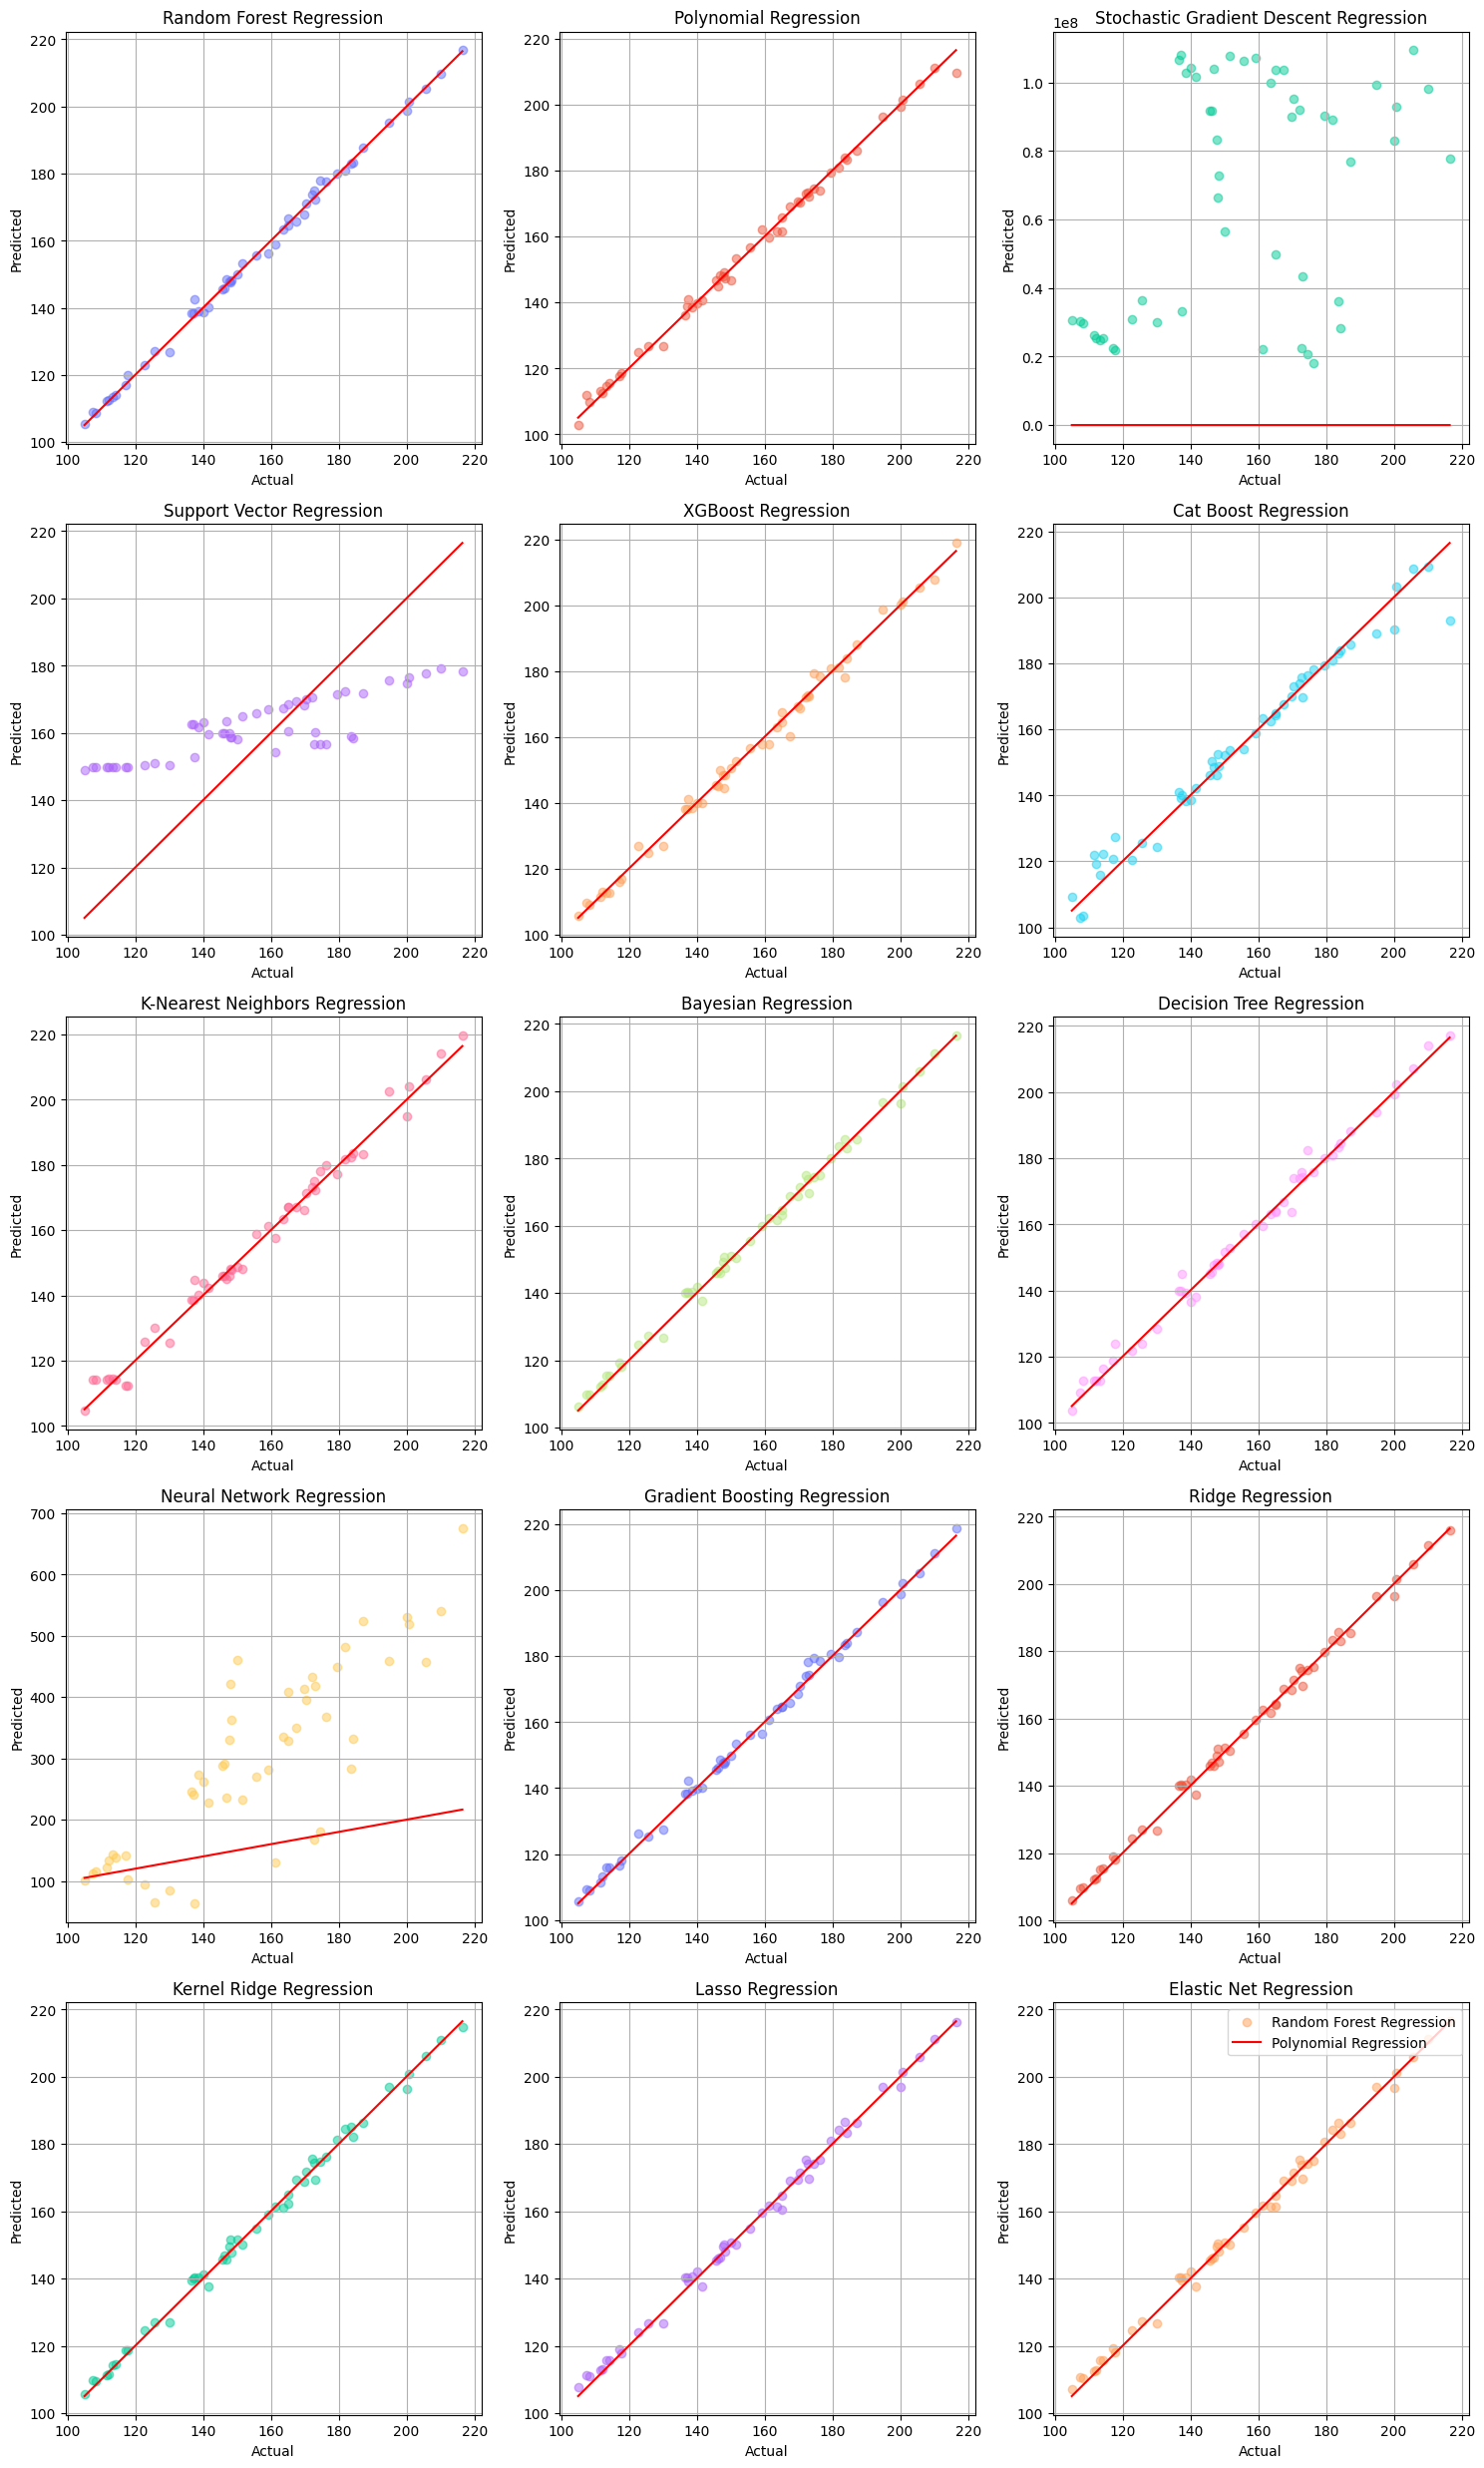

In [43]:
# import os
import plotly.express as px
from itertools import cycle
palette = cycle(px.colors.qualitative.Plotly)

model_performance = {}
model_performance = {
    'Random Forest Regression': {'Predicted': forest_y_pred, 'Actual': y_test},
    'Polynomial Regression': {'Predicted': poly_y_pred, 'Actual': y_test},
    'Stochastic Gradient Descent Regression': {'Predicted': SGDRegressor_y_pred, 'Actual': y_test},
    'Support Vector Regression': {'Predicted': svr_y_pred, 'Actual': y_test},
    'XGBoost Regression': {'Predicted': xgb_y_pred, 'Actual': y_test},
    'Cat Boost Regression': {'Predicted': catboost_y_pred, 'Actual': y_test},
    'K-Nearest Neighbors Regression': {'Predicted': knn_y_pred, 'Actual': y_test},
    'Bayesian Regression': {'Predicted': bayesian_y_pred, 'Actual': y_test},
    'Decision Tree Regression': {'Predicted': tree_y_pred, 'Actual': y_test},
    'Neural Network Regression': {'Predicted': nn_y_pred, 'Actual': y_test},
    'Gradient Boosting Regression': {'Predicted': gb_y_pred, 'Actual': y_test},
    'Ridge Regression': {'Predicted': ridge_y_pred, 'Actual': y_test},
    'Kernel Ridge Regression': {'Predicted': kernel_ridge_y_pred, 'Actual': y_test},
    'Lasso Regression': {'Predicted': lasso_y_pred, 'Actual': y_test},
    'Elastic Net Regression': {'Predicted': elastic_net_y_pred, 'Actual': y_test},
    
}

# Set up figure and axes
num_models = len(model_performance)
num_rows = (num_models // 3) + (1 if num_models % 3 != 0 else 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Define color palette
color_palette = plt.cm.Set1(range(num_models))

# Iterate over the models and plot the predicted vs actual values
for i, (model, performance) in enumerate(model_performance.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Get the predicted and actual values
    y_pred = performance['Predicted']
    y_actual = performance['Actual']

    # Scatter plot of predicted vs actual values
    ax.scatter(y_actual, y_pred, color=next(palette), alpha=0.5, marker='o')

    # Add a diagonal line for reference
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='r')

    # Set the title and labels
    ax.set_title(model)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    # Add gridlines
    ax.grid(True)

# Adjust spacing between subplots
fig.tight_layout()

# Create a legend
plt.legend(model_performance.keys(), loc='upper right')

# Show the plot
plt.show()

### Sorting according to the Error so that in future we can build custom models and generate results with less error

### The Errors of the Stochastic Gradient Descent Regression, Neural Network Regression and Support Vector Regression are high which supresses the visualization so if you want to visualize all the variables in the below bar graph then comment the below code block and rerun the whole code

In [44]:
i = Model_Selection[((Model_Selection.Model == 'Stochastic Gradient Descent Regression'))].index
Model_Selection=Model_Selection.drop(i)

i = Model_Selection[((Model_Selection.Model == 'Neural Network Regression'))].index
Model_Selection=Model_Selection.drop(i)

i = Model_Selection[((Model_Selection.Model == 'Support Vector Regression'))].index
Model_Selection=Model_Selection.drop(i)

<Axes: title={'center': 'Accuracy and Error Rate'}, xlabel='Model'>

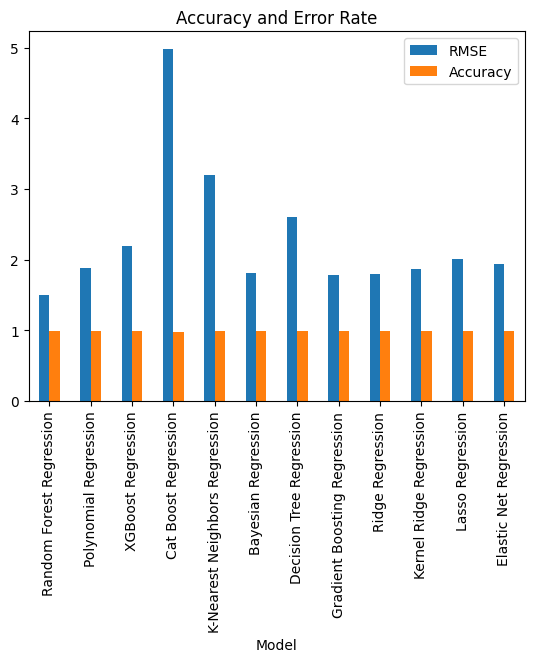

In [45]:
Model_Selection.plot(x='Model', kind="bar",title="Accuracy and Error Rate")

In [46]:
Model_Selection.sort_values('RMSE')

Model      RMSE  Accuracy
1         Random Forest Regression  1.499416  0.997347
11    Gradient Boosting Regression  1.783258  0.996247
12                Ridge Regression  1.794517  0.996200
8              Bayesian Regression  1.806797  0.996147
13         Kernel Ridge Regression  1.869142  0.995877
2            Polynomial Regression  1.888644  0.995790
15          Elastic Net Regression  1.934269  0.995585
14                Lasso Regression  2.016258  0.995202
5               XGBoost Regression  2.189149  0.994344
9         Decision Tree Regression  2.600201  0.992021
7   K-Nearest Neighbors Regression  3.192851  0.987969
6             Cat Boost Regression  4.978665  0.970747

### The Model with least error and heighest accuracy

In [47]:
highest_accuracy = max(Accuracy, key=Accuracy.get)
print(highest_accuracy)
print(Accuracy[highest_accuracy])

least_error = min(Error, key= Error.get)
print(least_error)
print(Error[least_error])

Random Forest Regression
0.9973467037914808
Random Forest Regression
1.4994160137075965


## Conclusion

Many features like GDP (NA00334Q), Resential Property Prices (QUSR628BIS), Total Construction Spending (TTLCONS), Median Home Price, CPI all have positive correlation.If any one of them increases all of them increases

Interestingly some features like House Ownership Rate (RSAHORUSQ156S), New Privately-Owned Housing Units Authorized in Permit-Issuing Places (PERMIT) have negative corelation and some features like Family Homes for Sale in the United States (HNFSEPUSSA), Family Houses Sold (HSN1F), New Privately-Owned Housing Units Started: Single-Family Units Units (HOUST1F) have positive corelation with the above features which indirectly affects the National Home Price Index

The best model to predict National Home Price Index from the above comparative analysis is Random Forest regression.